# Tugas 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/ML/voice.csv')

# --- Preprocessing ---
# a. Label Encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# b. Pisahkan Fitur (X) dan Target (y)
X = df.drop('label', axis=1)
y = df['label']

# Simpan nama kolom untuk laporan akhir
feature_names = X.columns.tolist()

print("Data berhasil di-load dan di-encode.")
df.head()

Data berhasil di-load dan di-encode.


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [ ]:
# c. Split Data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# d. Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data berhasil di-split dan di-scaling.")
print(f"Jumlah data training: {X_train_scaled.shape[0]}")
print(f"Jumlah data testing: {X_test_scaled.shape[0]}")

Data berhasil di-split dan di-scaling.
Jumlah data training: 2217
Jumlah data testing: 951


**Seleksi fitur**

In [ ]:
print("Memulai eksperimen seleksi fitur...")

feature_accuracies = []
k_range_features = range(1, X.shape[1] + 1)

for k_features in k_range_features:
    # 1. Pilih k fitur terbaik
    selector = SelectKBest(f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    # 2. Latih model kNN
    knn_test = KNeighborsClassifier(n_neighbors=5)
    knn_test.fit(X_train_selected, y_train)

    # 3. Evaluasi dan simpan akurasi
    accuracy = knn_test.score(X_test_selected, y_test)
    feature_accuracies.append(accuracy)

# Cari jumlah fitur terbaik
best_num_features = np.argmax(feature_accuracies) + 1
best_accuracy_features = max(feature_accuracies)

print(f"\n--- Hasil Seleksi Fitur ---")
print(f"Akurasi terbaik ({best_accuracy_features:.4f}) didapat saat menggunakan {best_num_features} fitur.")

# Dapatkan dan tampilkan nama-nama fitur terbaik
final_selector = SelectKBest(f_classif, k=best_num_features)
final_selector.fit(X_train_scaled, y_train)
best_feature_indices = final_selector.get_support(indices=True)
best_features_list = [feature_names[i] for i in best_feature_indices]

print("\nFitur-fitur terbaik tersebut adalah:")
for f in best_features_list:
    print(f"- {f}")

Memulai eksperimen seleksi fitur...

--- Hasil Seleksi Fitur ---
Akurasi terbaik (0.9811) didapat saat menggunakan 6 fitur.

Fitur-fitur terbaik tersebut adalah:
- sd
- Q25
- IQR
- sp.ent
- sfm
- meanfun


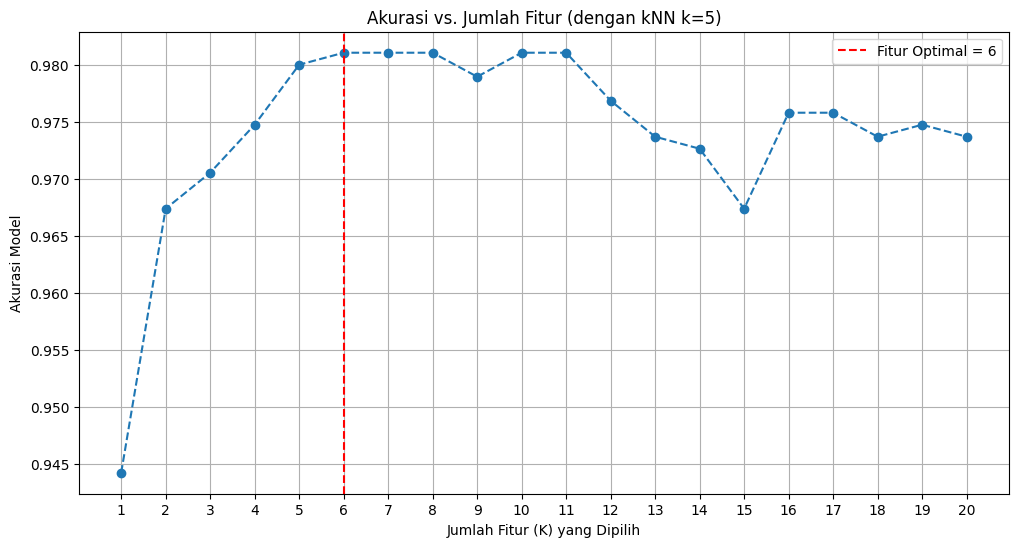

In [ ]:
# Plot hasil seleksi fitur
plt.figure(figsize=(12, 6))
plt.plot(k_range_features, feature_accuracies, marker='o', linestyle='--')
plt.title('Akurasi vs. Jumlah Fitur (dengan kNN k=5)')
plt.xlabel('Jumlah Fitur (K) yang Dipilih')
plt.ylabel('Akurasi Model')
plt.xticks(k_range_features)
plt.grid(True)
plt.axvline(x=best_num_features, color='red', linestyle='--', label=f'Fitur Optimal = {best_num_features}')
plt.legend()
plt.show()

In [ ]:
# Siapkan data dengan fitur terbaik
X_train_best = final_selector.transform(X_train_scaled)
X_test_best = final_selector.transform(X_test_scaled)

print(f"--- Memulai Tuning Nilai 'k' kNN (Menggunakan {best_num_features} Fitur Terbaik) ---")

k_accuracies = []
k_range_knn = range(1, 31) # Kita uji k dari 1 sampai 30

for k_knn in k_range_knn:
    knn = KNeighborsClassifier(n_neighbors=k_knn)
    knn.fit(X_train_best, y_train)
    accuracy = knn.score(X_test_best, y_test)
    k_accuracies.append(accuracy)

# Cari nilai k (tetangga) terbaik
best_k_knn = np.argmax(k_accuracies) + 1 # +1 karena index mulai dari 0
best_accuracy_knn = max(k_accuracies)

print(f"Akurasi terbaik ({best_accuracy_knn:.4f}) didapat saat k = {best_k_knn}")

--- Memulai Tuning Nilai 'k' kNN (Menggunakan 6 Fitur Terbaik) ---
Akurasi terbaik (0.9832) didapat saat k = 8


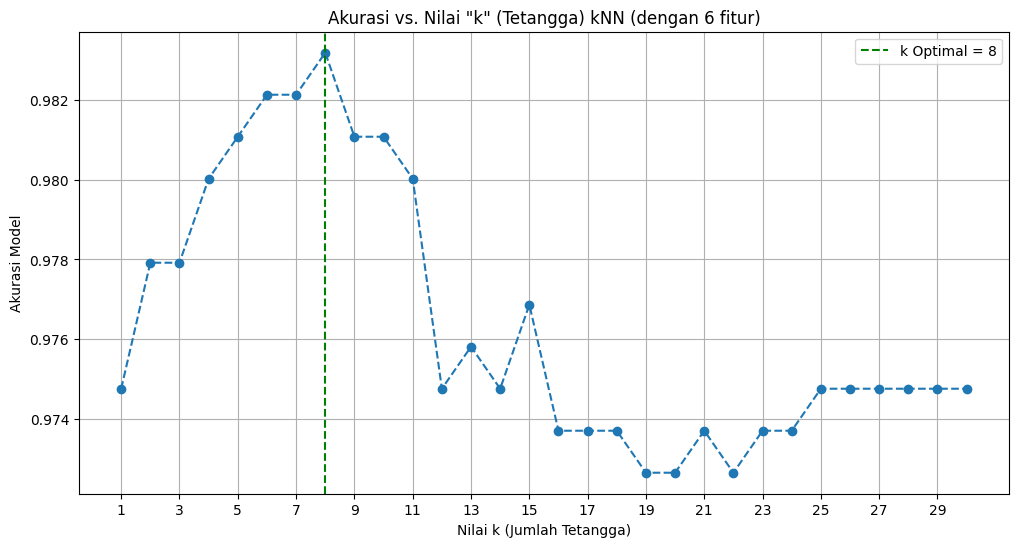

In [ ]:
# Plot hasil tuning nilai 'k'
plt.figure(figsize=(12, 6))
plt.plot(k_range_knn, k_accuracies, marker='o', linestyle='--')
plt.title(f'Akurasi vs. Nilai "k" (Tetangga) kNN (dengan {best_num_features} fitur)')
plt.xlabel('Nilai k (Jumlah Tetangga)')
plt.ylabel('Akurasi Model')
plt.xticks(np.arange(1, 31, 2))
plt.grid(True)
plt.axvline(x=best_k_knn, color='green', linestyle='--', label=f'k Optimal = {best_k_knn}')
plt.legend()
plt.show()